Dataset Source: https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [57]:
diabetes = pd.read_csv('C:/Users/udin0/OneDrive/Documents/GitHub/NN-Classification-Diabetes-Health-Database/DiabetesDataset/diabetes_dataset.csv')

diabetes.head(5)

diabetes.shape

(100000, 31)

In [58]:
diabetes

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [59]:
# Check if there are any missing values at all
print(diabetes.isna().any().any())

# # See how many missing values per column
# print(diabetes.isna().sum())

# # Or show columns with missing values only
# print(diabetes[diabetes.columns[diabetes.isna().any()]].isna().sum())

False


In [60]:
X = diabetes.drop(['diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes'], axis=1)
y_numerical = diabetes['diabetes_risk_score']
y_binary = diabetes['diagnosed_diabetes']
y_multiclass = diabetes['diabetes_stage']

X.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c'],
      dtype='object')

In [61]:
diabetes[diabetes.duplicated()]

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes


In [62]:
corr_matrix = diabetes.corr(numeric_only=True)

# Take upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9 (you can adjust threshold)
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

print("Highly correlated columns to consider dropping:")
print(to_drop)

Highly correlated columns to consider dropping:
['ldl_cholesterol', 'hba1c']


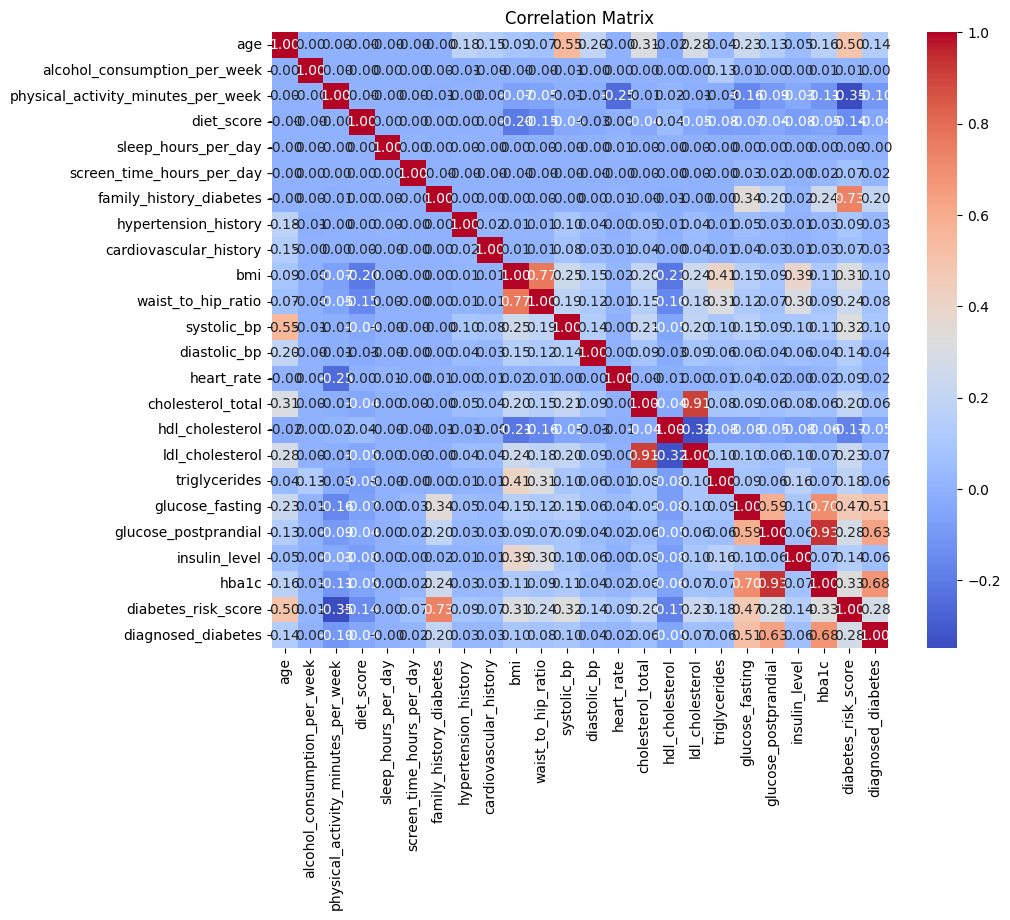

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [64]:
diabetes.describe(include="all")

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
count,100000.00000,100000,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
unique,NaN,3,5,4,5,4,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Female,White,Highschool,Middle,Employed,Never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Type 2,NaN
freq,NaN,50216,44997,44891,35152,60175,59813,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59774,NaN
mean,50.12041,NaN,NaN,NaN,NaN,NaN,NaN,2.003670,118.911640,5.994787,...,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,NaN,0.599980
std,15.60460,NaN,NaN,NaN,NaN,NaN,NaN,1.417779,84.409662,1.780954,...,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,NaN,0.489904
min,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,NaN,0.000000
25%,39.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,57.000000,4.800000,...,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,NaN,0.000000
50%,50.00000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,100.000000,6.000000,...,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,NaN,1.000000
75%,61.00000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,160.000000,7.200000,...,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,NaN,1.000000


In [65]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

transformer_num = make_pipeline(
    StandardScaler(),
)
transformer_cat = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, numerical_features),
    (transformer_cat, categorical_features),
)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y_binary, stratify=y_binary, train_size=0.8, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, stratify=y_train_full, train_size=0.75, random_state=42
)
print(f"Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}")

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]
print(input_shape)

Train: (60000, 28), Valid: (20000, 28), Test: (20000, 28)
[46]


Neural Network Model

In [66]:
NN_Classification = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

NN_Classification.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

c:\Users\udin0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = NN_Classification.fit(
    X_train, y_train,
    validation_data=(X_valid,y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)



Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.7414 - loss: 0.5585 - val_binary_accuracy: 0.8274 - val_loss: 0.3796
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8381 - loss: 0.3803 - val_binary_accuracy: 0.8657 - val_loss: 0.3168
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.8607 - loss: 0.3295 - val_binary_accuracy: 0.8787 - val_loss: 0.2907
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8746 - loss: 0.3013 - val_binary_accuracy: 0.8878 - val_loss: 0.2760
Epoch 5/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.8845 - loss: 0.2835 - val_binary_accuracy: 0.8943 - val_loss: 0.2650
Epoch 6/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.8878 - loss: 0.2762 - val_binary_accuracy: 0.8979 - val_loss: 0.2576
Epoch 7/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8897 - loss: 0.2721 - val_binary_accuracy: 0.9033 - val_loss: 0.2515

Minimum Validation Loss: 0.2253


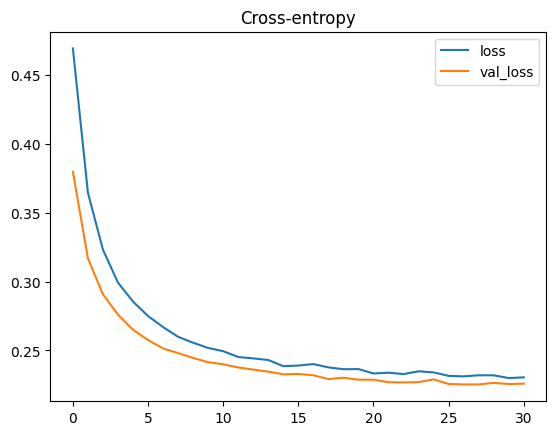

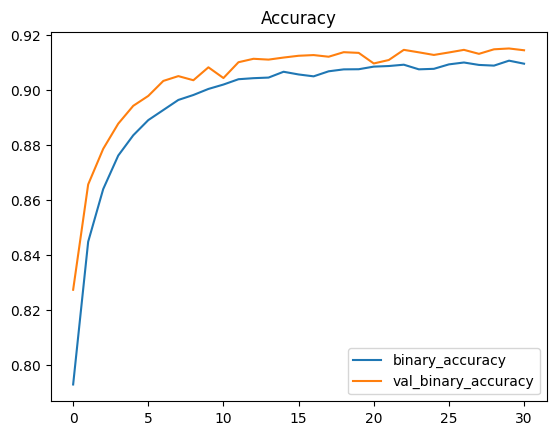

In [68]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [69]:
test_loss, test_accuracy = NN_Classification.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2283
Test Accuracy: 0.9134
